In [1]:
import numpy as np
from sklearn import datasets
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold
import pandas as pd
import timeit

1. IMPLEMENTACJA

In [2]:
class KNNClassifier:
    def __init__(self, n_neighbors=1, use_KDTree=False):
        self.n_neighbors = n_neighbors
        self.use_KDTree = use_KDTree


    @staticmethod
    def euclidean(X_train, X):
        return np.sqrt(np.sum((X_train - X)**2, axis=1))


    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

        return self
    


    def predict(self, X):
        y = []
        
        if self.use_KDTree == False:
            for x in X:
                distances = KNNClassifier.euclidean(self.X_train, x)

                neighbors_idx = np.argsort(distances)[0:self.n_neighbors]
                neighbors_labels = self.y_train[neighbors_idx]

                yi = mode(neighbors_labels)
                y.append(yi)
        else:
            tree = KDTree(self.X_train)
            for x in X:
                _, neighbors_idx = tree.query([x], k=self.n_neighbors)
                neighbors_idx = neighbors_idx[0]
                neighbors_labels = self.y_train[neighbors_idx]

                yi = mode(neighbors_labels)
                y.append(yi)

        y = np.array(y)
        return y


    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.sum(y == y_pred) / len(y)
        return accuracy * 100

In [3]:
class KNNRegressor:
    def __init__(self, n_neighbors=1, use_KDTree=False):
        self.n_neighbors = n_neighbors
        self.use_KDTree = use_KDTree


    @staticmethod
    def euclidean(X_train, X):
        return np.sqrt(np.sum((X_train - X)**2, axis=1))
    

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

        return self


    def predict(self, X):
        y = []

        if self.use_KDTree == False:
            for x in X:
                distances = KNNClassifier.euclidean(self.X_train, x)

                neighbors_idx = np.argsort(distances)[0:self.n_neighbors]
                neighbors_labels = self.y_train[neighbors_idx]

                yi = np.mean(neighbors_labels)
                y.append(yi)
        else:
            tree = KDTree(self.X_train)
            for x in X:
                _, neighbors_idx = tree.query([x], k=self.n_neighbors)
                neighbors_idx = neighbors_idx[0]
                neighbors_labels = self.y_train[neighbors_idx]

                yi = np.mean(neighbors_labels)
                y.append(yi)


        y = np.array(y)
        return y


    def score(self, X, y):
        y_pred = self.predict(X)
        MSE = np.mean(np.square(np.subtract(y, y_pred)))

        return MSE

2. KLASYFIKACJA

Zadanie 1

In [4]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_repeated=0, random_state=3)

Zadanie 2

In [5]:
knnClassifier = KNNClassifier(n_neighbors=2, use_KDTree=True)
# knnClassifier = KNNClassifier(n_neighbors=2, use_KDTree=False)
knnClassifier.fit(X, y);

Zadanie 3

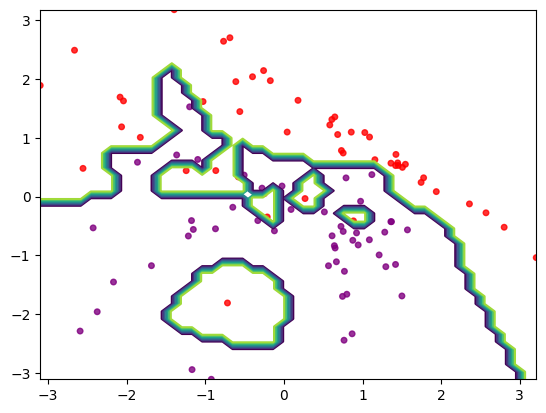

In [6]:
x_ = np.linspace(np.amin(X[:, 0]), np.amax(X[:, 0]))
y_ = np.linspace(np.amin(X[:, 1]), np.amax(X[:, 1]))
xv, yv = np.meshgrid(x_, y_)

Z = knnClassifier.predict(np.vstack((xv.ravel(), yv.ravel())).T)
Z = Z.reshape(xv.shape)
plt.contour(xv, yv, Z)
colormap = np.array(['purple', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], alpha=0.8, s=4**2);


Zadanie 4

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

knnClassifier.fit(X, y);

Zadanie 5

In [8]:
pca = PCA(n_components=2)
# X_reduced = pca.fit(X).transform(X)
X_reduced = pca.fit_transform(X)

a)

In [9]:
x_ = np.linspace(np.amin(X_reduced [:, 0]), np.amax(X_reduced [:, 0]))
y_ = np.linspace(np.amin(X_reduced [:, 1]), np.amax(X_reduced [:, 1]))
xv, yv = np.meshgrid(x_, y_)

mesh_flat = np.vstack((xv.ravel(), yv.ravel())).T

b)

In [10]:
X_extended = pca.inverse_transform(mesh_flat)

c)

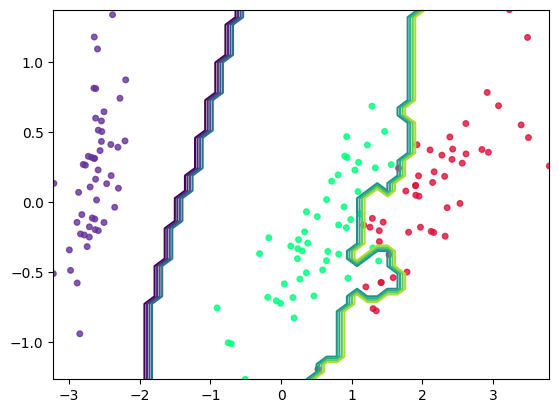

In [11]:
Z = knnClassifier.predict(X_extended)
Z = Z.reshape(xv.shape)

plt.contour(xv, yv, Z)
colormap = np.array(['rebeccapurple', 'springgreen', 'crimson'])
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colormap[y], alpha=0.8, s=4**2);

Zadanie 6

In [12]:

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_repeated=0, random_state=3)

K = np.arange(2, 20, dtype=np.int8)

loo = LeaveOneOut()
errors = []

for k in K:
    knn = KNNClassifier(n_neighbors=k)
    k_scores = []

    for train_index, test_index in loo.split(X):
        X_train = X[train_index]
        X_test = X[test_index]

        y_train = y[train_index]
        y_test = y[test_index]

        knn.fit(X_train, y_train)

        score = knn.score(X_test, y_test)
        k_scores.append(score)
    
    errors.append(100 - np.mean(k_scores))


errors = np.char.add(np.array(errors).astype(np.int8).astype(str), '%')
data = np.vstack((K, errors)).T
df = pd.DataFrame(data, columns=['K:', 'Błąd:'])
df = df.set_index('K:').transpose()
df

K:,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Błąd:,20%,17%,17%,16%,18%,15%,15%,15%,15%,14%,15%,16%,17%,16%,16%,15%,15%,14%


Zadanie 7

In [13]:
X, y = datasets.make_classification(n_samples=5000, n_features=3, n_informative=2,
                                    n_redundant=0, n_repeated=0, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNNClassifier(n_neighbors=3, use_KDTree=False)
knn_kdtree = KNNClassifier(n_neighbors=3, use_KDTree=True)

knn.fit(X_train, y_train)
knn_kdtree.fit(X_train, y_train)

t = timeit.timeit(lambda: knn.predict(X_test), number=5)
t_kdtree = timeit.timeit(lambda: knn_kdtree.predict(X_test), number=5)

# print(t)
print(f"Czas [n_samples=5000, n_features=3, test_size=0.3, number of executions=5]:\n\tPodstawowa wersja algorytmu: {t:.2f}s\n\tWersja korzystająca z kD-Drzew: {t_kdtree:.2f}s")

Czas [n_samples=5000, n_features=3, test_size=0.3, number of executions=5]:
	Podstawowa wersja algorytmu: 2.07s
	Wersja korzystająca z kD-Drzew: 0.34s


3. REGRESJA

Zadanie 1

In [14]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=2, random_state=5)

Zadanie 2

In [15]:
knnRegressor = KNNRegressor(n_neighbors=2, use_KDTree=False)
# knnRegressor = KNNRegressor(n_neighbors=2, use_KDTree=True)
knnRegressor.fit(X, y);

y_pred = knnRegressor.predict(X)

Zadanie 3

In [16]:
MSE = knnRegressor.score(X, y)
print(f"Błąd średniokwadratowy: {MSE:.2f}")

# from sklearn.metrics import mean_squared_error
# y_pred = knnRegressor.predict(X)
# mean_squared_error(y, y_pred)

Błąd średniokwadratowy: 13.26


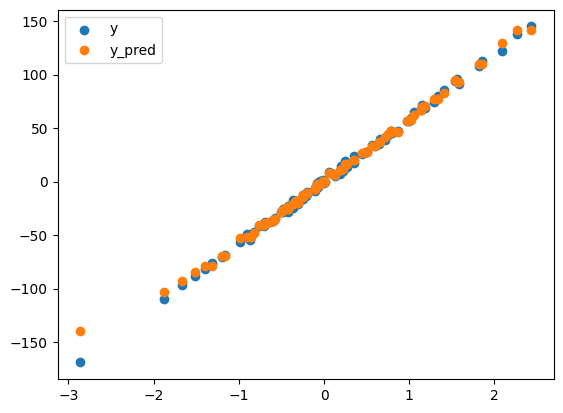

In [17]:
plt.scatter(X, y, label='y')
plt.scatter(X, y_pred, label='y_pred')
plt.legend();

Zadanie 4

In [18]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
df = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
X = np.hstack([df.values[::2, :], df.values[1::2, :2]])
y = df.values[1::2, 2]


Zadanie 5

In [19]:
K = np.arange(2, 20, dtype=np.int8)
MSE = []

kf = KFold(n_splits=10)

for k in K:
    knn = KNNRegressor(n_neighbors=k, use_KDTree=True)

    k_mse = []

    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        X_test = X[test_index]

        y_train = y[train_index]
        y_test = y[test_index]

        knn.fit(X_train, y_train)

        mse = knn.score(X_test, y_test)
        k_mse.append(mse)

    MSE.append(np.mean(k_mse))

MSE = np.round(MSE, 2)

data = np.vstack((K, MSE)).T
df = pd.DataFrame(data, columns=['K:', 'MSE:'])
df['K:'] = df['K:'].astype(np.int8)
df = df.set_index('K:').transpose()
df

K:,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MSE:,104.29,105.71,105.66,107.29,99.29,95.78,93.58,92.39,90.51,89.17,87.46,87.17,85.03,84.87,83.88,83.68,83.22,82.52
